## Linear Regression Vanilla Implementation from Scratch

* 20205318 Kim Jaeho

In [1]:
import numpy as np
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import collections
import seaborn as sns
import pandas as pd
import os

## 1. Load Data and Split Data

In [2]:
data_dir = 'data/'
music_df = pd.read_csv(data_dir+'default_features_1059_tracks.csv')

In [3]:
X = np.array(music_df.iloc[:,:-2])

In [38]:
X.shape

(1059, 68)

In [4]:
latitude = np.array(music_df.Latitude)
longitude = np.array(music_df.Longitude)

* Set random state to **split dataset into train, val, test**

In [5]:
random_state = 112

In [6]:
def split_data(X,latitude,longitude,random_state):
    X_train, X_test, latitude_train, latitude_test = train_test_split(X, latitude, test_size=0.2,random_state=random_state)
    _, _, longitude_train, longitude_test = train_test_split(X, longitude, test_size=0.2,random_state=random_state)
    X_train, X_val , latitude_train, latitude_val = train_test_split(X_train, latitude_train, test_size=0.2,random_state=random_state)
    longitude_train, longitude_val = train_test_split(longitude_train, test_size=0.2,random_state=random_state)
    
    return X_train, X_val, X_test, latitude_train, latitude_val ,latitude_test, longitude_train, longitude_val,longitude_test

In [7]:
X_train, X_val, X_test, latitude_train, latitude_val ,latitude_test, longitude_train, longitude_val,longitude_test=  split_data(X,latitude,longitude,random_state)

In [8]:
print(f'Train_X Shape:{X_train.shape}, Val_X:{X_val.shape}, Test_X Shape: {X_test.shape}')
print(f'latitude train Shape:{latitude_train.shape}, latitude val Shape:{latitude_val.shape}, latitude test Shape:{latitude_test.shape}')
print(f'longitude train Shape:{longitude_train.shape}, longitude val Shape:{longitude_val.shape}, longitude test Shape:{longitude_test.shape}')

Train_X Shape:(677, 68), Val_X:(170, 68), Test_X Shape: (212, 68)
latitude train Shape:(677,), latitude val Shape:(170,), latitude test Shape:(212,)
longitude train Shape:(677,), longitude val Shape:(170,), longitude test Shape:(212,)


## 2. Check Scikit learn linear Regression for comparison

In [9]:
from sklearn.linear_model import LinearRegression as SKLinearRegression 
sklearn_model = SKLinearRegression()
sklearn_model.fit(X_train,latitude_train)
y_predict_sklearn = sklearn_model.predict(X_test)
r2_score(latitude_test,y_predict_sklearn)

0.2505020096027709

* Since Linear Regression has a **global solution**, the value should be same for the implemented model and sckit model

## 3. Implement Vanilla Linear Regression Class

In [10]:
class LinearRegression:
    def __init__(self):
        pass
    def fit(self,train_X,train_y):
        assert isinstance(train_X,(np.ndarray)) == True
        assert isinstance(train_y,(np.ndarray)) == True
        train_X = np.insert(train_X,0,np.ones((train_X.shape[0])),axis=1)
        self.train_X = train_X
        self.train_y = train_y
        self.N, self.D = train_X.shape
        self.estimate_coef()
    def estimate_coef(self):
        betas = np.matmul(np.matmul(inv(np.matmul(self.train_X.T,self.train_X)),self.train_X.T),self.train_y)
        self.coef = betas[1:]
        self.intercept = betas[0]
    def predict(self,test_X,test_y,print_score=True):
        predict_y = np.matmul(test_X,self.coef)+self.intercept
        if print_score:
            print('Implemented R2 score: ',self.r2_score(test_y,predict_y))
            print('ScikitLearn R2 score: ',r2_score(test_y,predict_y))
        return r2_score(test_y,predict_y)
    def r2_score(self,y_true,y_pred):
        y_bar = np.mean(y_true)
        SSR = np.sum((y_true-y_pred)**2)
        SST = np.sum((y_true-y_bar)**2)
        r2=  1-(SSR/SST)
        return r2
    def coef_values(self,save_name=None):
        coef_dict={}
        for idx,coef_val in enumerate(self.coef):
            coef_dict[str(idx+1)]= coef_val
        coef_dicts= dict(sorted(coef_dict.items(), key=lambda item: item[1]))
        plt.bar(range(len(coef_dicts)), list(coef_dicts.values()), align='center')
        plt.title('Coefficient Values Sorted')
        if save_name:
            plt.savefig(f'fig/{save_name}.png',dpi=300)
        plt.show()

Implemented R2 score:  0.2505020096027707
ScikitLearn R2 score:  0.2505020096027707


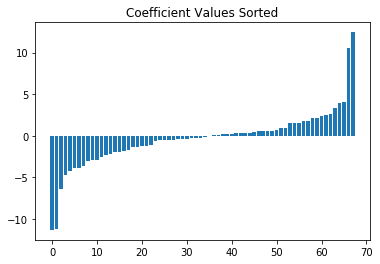

In [11]:
model = LinearRegression()
model.fit(X_train,latitude_train)
model.predict(X_test,latitude_test)
model.coef_values('coef_norms_vanilla_latitude')

* The R-square is **exactly same** as the Scikit learn

Implemented R2 score:  0.2407273105591028
ScikitLearn R2 score:  0.2407273105591028


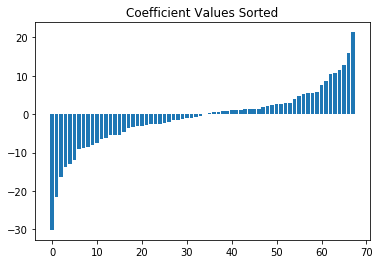

In [12]:
model = LinearRegression()
model.fit(X_train,longitude_train)
model.predict(X_test,longitude_test)
model.coef_values('coef_norms_vanilla_longitude')

## 4. Implement Ridge Regression Class(L2)

In [13]:
class RidgeLinearRegression(LinearRegression):
    def __init__(self,regularizer_coef=75):
        self.regularizer_coef = regularizer_coef
    def estimate_coef(self):
        betas = np.matmul(np.matmul(inv(np.matmul(self.train_X.T,self.train_X)+self.regularizer_coef*np.eye(self.D)),self.train_X.T),self.train_y)
        self.coef = betas[1:]
        self.intercept = betas[0]

Implemented R2 score:  0.22081014731542747
ScikitLearn R2 score:  0.22081014731542747


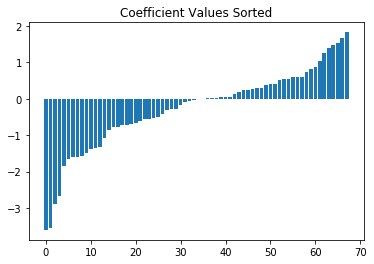

In [14]:
Ridge = RidgeLinearRegression(75)
Ridge.fit(X_train,latitude_train)
Ridge.predict(X_test,latitude_test)
Ridge.coef_values('coef_norms_ridge_latitude')

Implemented R2 score:  0.26628298343184176
ScikitLearn R2 score:  0.26628298343184176


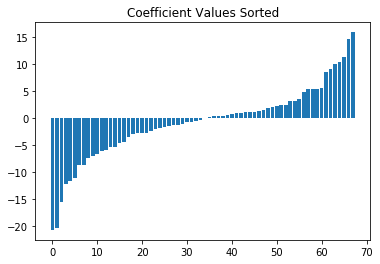

In [15]:
Ridge = RidgeLinearRegression(5)
Ridge.fit(X_train,longitude_train)
Ridge.predict(X_test,longitude_test)
Ridge.coef_values('coef_norms_ridge_longitude')

## 5. Implement Lasso Regression Class(L1)

In [16]:
class LassoLinearRegression(LinearRegression):
    def __init__(self,regularizer_coef=50):
        self.regularizer_coef = regularizer_coef
    def estimate_coef(self,epoch=50):
        self.betas = np.zeros(self.D)
        update_threshold = 10
        #while update_threshold > 5:
        for e in range(epoch):
            for d in range(self.D):
                # Calculate except the bias term
                ro = self.calculate_ro_j(d)
                denominator = np.sum(self.train_X[:,d]**2,axis=0)
                if ro > self.regularizer_coef:
                    self.betas[d]= (-self.regularizer_coef+ro)/ denominator
                elif ro < -self.regularizer_coef:
                    self.betas[d]= (self.regularizer_coef+ro)/ denominator
                else:
                    self.betas[d]=0
        self.coef = self.betas[1:]
        self.intercept = self.betas[0]
    def calculate_ro_j(self,current_j):
        other_column_indices = [i for i in range(self.D) if i!=current_j]
        
        coefs_without_j = self.betas[other_column_indices]
        X_without_j = self.train_X[:,other_column_indices]
        ro = np.sum(np.multiply(self.train_y-np.sum(np.multiply(coefs_without_j,X_without_j),axis=1),self.train_X[:,current_j]),axis=0)
        return ro
    
    def count_zero_coefs(self):
        counts = collections.Counter(self.coef)
        print(f'There are total of {counts[0]} zeros in coefficients out of {len(self.coef)}')
        
    
        
        

Implemented R2 score:  0.2573964319787724
ScikitLearn R2 score:  0.2573964319787724


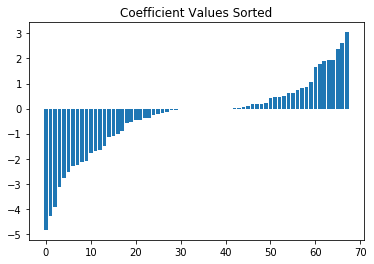

In [17]:
Lasso = LassoLinearRegression()
Lasso.fit(X_train,latitude_train)
Lasso.predict(X_test,latitude_test)
Lasso.coef_values('coef_norms_lasso_latitude')

Implemented R2 score:  0.26915143597247326
ScikitLearn R2 score:  0.26915143597247326


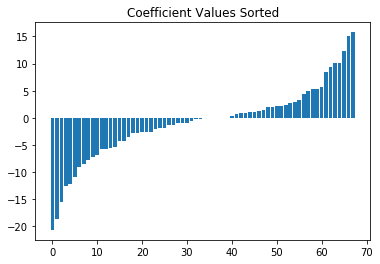

In [18]:
Lasso = LassoLinearRegression()
Lasso.fit(X_train,longitude_train)
Lasso.predict(X_test,longitude_test)
Lasso.coef_values('coef_norms_ridge_longitude')

# Questions

### 2-A. 
* First, build a straightforward linear regression of latitude and longitude respectively against features. What is the R-squared of each model? Plot a graph evaluating each regression



**ANS)** 

* Maximum R2 value for Simple Linear Regression
* latitude:0.2900213312438068 longitude:0.31973198253178436

* Maximum R2 value for Ridge
* latitude:0.22799450780304376 longitude:0.29962473733787753

* Maximum R2 value for Lasso
* latitude:0.2872992666286345 longitude:0.319594923194787

In [19]:
def plot_r2(X,latitude,longitude):
    random_states = range(100)
    vanilla_latitude_regression=[]
    ridge_latitude_regression = []
    lasso_latitude_regression =[]
    
    vanilla_longitude_regression=[]
    ridge_longitude_regression = []
    lasso_longitude_regression =[]
    
    maximum_r2_ridge =-1
    maximum_r2_lasso =-1
    maximum_random_state_ridge =-1
    maximum_random_state_lasso =-1
    
    for i in random_states:
        if i%10==0:
            print('Random State ',i)
        X_train, X_val, X_test, latitude_train, latitude_val ,latitude_test, longitude_train, longitude_val,longitude_test= split_data(X,latitude,longitude,random_state=i)
        vanilla = LinearRegression()
        vanilla.fit(X_train,latitude_train)
        vanilla_latitude_regression.append(vanilla.predict(X_test,latitude_test,False))

        vanilla = LinearRegression()
        vanilla.fit(X_train,longitude_train)
        vanilla_longitude_regression.append(vanilla.predict(X_test,longitude_test,False))
        
        Ridge = RidgeLinearRegression()
        Ridge.fit(X_train,latitude_train)
        ridge_latitude_regression.append(Ridge.predict(X_test,latitude_test,False))
        if Ridge.predict(X_test,latitude_test,False)> maximum_r2_ridge:
            maximum_random_state_ridge= i
            maximum_r2_ridge = Ridge.predict(X_test,latitude_test,False)
            

        Ridge = RidgeLinearRegression()
        Ridge.fit(X_train,longitude_train)
        ridge_longitude_regression.append(Ridge.predict(X_test,longitude_test,False))

        Lasso = LassoLinearRegression()
        Lasso.fit(X_train,latitude_train)
        lasso_latitude_regression.append(Lasso.predict(X_test,latitude_test,False))
        if Lasso.predict(X_test,latitude_test,False)> maximum_r2_lasso:
            maximum_random_state_lasso= i
            maximum_r2_lasso =Lasso.predict(X_test,latitude_test,False)
            
        Lasso = LassoLinearRegression()
        Lasso.fit(X_train,longitude_train)
        lasso_longitude_regression.append(Lasso.predict(X_test,longitude_test,False))
    print(f'Maximum Random State for Ridge is {maximum_random_state_ridge} and Maximum Random State for Lasso is {maximum_random_state_lasso}')
    print('')
    print('Maximum R2 value for Simple Linear Regression')
    print(f'latitude:{max(vanilla_latitude_regression)} longitude:{max(vanilla_longitude_regression)}')
    print('')
    print('Maximum R2 value for Ridge')
    print(f'latitude:{max(ridge_latitude_regression)} longitude:{max(ridge_longitude_regression)}')
    print('')
    print(f'Maximum R2 value for Lasso')
    print(f'latitude:{max(lasso_latitude_regression)} longitude:{max(lasso_longitude_regression)}')
    
    latitude_r2_dict ={'Vanilla_latitude':vanilla_latitude_regression,'Ridge_latitude':ridge_latitude_regression,'Lasso_latitude':lasso_latitude_regression,}

    longitude_r2_dict ={'Vanilla_longitude':vanilla_longitude_regression,'Ridge_longitude':ridge_longitude_regression,'Lasso_longitude':lasso_longitude_regression}
        
    return pd.DataFrame(latitude_r2_dict), pd.DataFrame(longitude_r2_dict)
        

In [20]:
latitude_df,longitude_df = plot_r2(X,latitude,longitude)

Random State  0
Random State  10
Random State  20
Random State  30
Random State  40
Random State  50
Random State  60
Random State  70
Random State  80
Random State  90
Maximum Random State for Ridge is 84 and Maximum Random State for Lasso is 84

Maximum R2 value for Simple Linear Regression
latitude:0.2900213312438068 longitude:0.31973198253178436

Maximum R2 value for Ridge
latitude:0.27646212759195954 longitude:0.3134377346167956

Maximum R2 value for Lasso
latitude:0.2872992666286345 longitude:0.319594923194787


In [21]:
latitude_df.head()

,Vanilla_latitude,Ridge_latitude,Lasso_latitude
0,0.185886,0.186094,0.207609
1,0.113527,0.163540,0.121442
2,0.141278,0.153475,0.162217
3,0.120958,0.163378,0.151643
4,-0.032516,0.078859,-0.011219


* I tested on 100 different combination of train test set by varying the random states of train test split. 

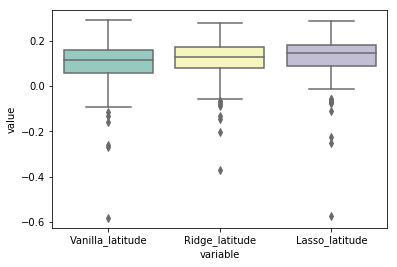

In [28]:
fig, ax = plt.subplots()
sns.boxplot(x = "variable", y = "value", palette = "Set3", data = pd.melt(latitude_df),ax=ax)
plt.savefig('fig/boxplot_comparison_latitude.png',dpi=300)

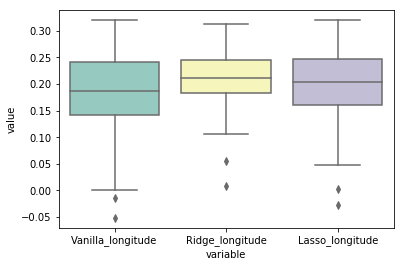

In [30]:
fig, ax = plt.subplots()
sns.boxplot(x = "variable", y = "value", palette = "Set3", data = pd.melt(longitude_df),ax=ax)
plt.savefig('fig/boxplot_comparison_longitude.png',dpi=300)

### 2-B. 
* A regression regularized by L2 (equivalently, a ridge regression). You should estimate the
regularization coefficient that produces the minimum error. Is the regularized regression better than the
unregularized regression?

* **ANS)** Regularized Ridge regression is not necessarily always better than unregrularized regression. As we can see the regressor predicting latitude performs poorly on average compared to vanilla regressor. This may be due to the nature of ridge regression, where it shrinks the coefficients for least important variables **close to zero**. However, it will never make them exactly zero where the final model will still be influenced by these non important variables. Thus, there may be cases where vanilla regressor outperforms ridge linear regression

* Best lambda value is 75 and 5 respectively

* Ref)https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

In [31]:
def plot_by_lambda_Ridge(X_train,X_val, longitude_train,longitude_val,latitude_train,latitude_val,lambda_max=200):
    lambda_lists =[5*i for i in range(lambda_max)]
    r2_vals_longitude ={}
    r2_vals_latitude ={}
    for lambda_val in lambda_lists:
        Ridge = RidgeLinearRegression(regularizer_coef=lambda_val)
        Ridge.fit(X_train,longitude_train)
        r2_vals_longitude[lambda_val]=Ridge.predict(X_val,longitude_val,False)


        Ridge = RidgeLinearRegression(regularizer_coef=lambda_val)
        Ridge.fit(X_train,latitude_train)
        r2_vals_latitude[lambda_val]=Ridge.predict(X_val,latitude_val,False)
        
    max_value_longitude = max(r2_vals_longitude.values())  # maximum value
    max_keys_longitude = [k for k, v in r2_vals_longitude.items() if v == max_value_longitude]

    max_value_latitude = max(r2_vals_latitude.values())  # maximum value
    max_keys_latitude = [k for k, v in r2_vals_latitude.items() if v == max_value_latitude]
    
    print('Longitude')
    print(f'R2 Value:{max_value_longitude}, Lambda: {max_keys_longitude[0]}')
    print('Latitude')
    print(f'R2 Value:{max_value_latitude}, Lambda: {max_keys_latitude[0]}')
    
    
    lists_longitude = sorted(r2_vals_longitude.items())
    lists_latitude = sorted(r2_vals_latitude.items())
    x_long, y_long = zip(*lists_longitude)
    plt.title('Longitude')
    plt.xlabel('Lambda Value')
    plt.ylabel('R2')
    plt.plot(x_long, y_long)
    plt.savefig('fig/lambda_longitude_ridge.png',dpi=300)
    plt.show()
    plt.title('Latitude')
    plt.xlabel('Lambda Value')
    plt.ylabel('R2')
    x_lat, y_lat = zip(*lists_latitude)
    plt.plot(x_lat, y_lat)
    plt.savefig('fig/lambda_latitude_ridge.png',dpi=300)
    plt.show()

Longitude
R2 Value:0.2295861064039053, Lambda: 75
Latitude
R2 Value:0.07590162382468513, Lambda: 5


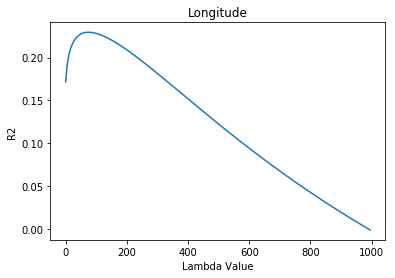

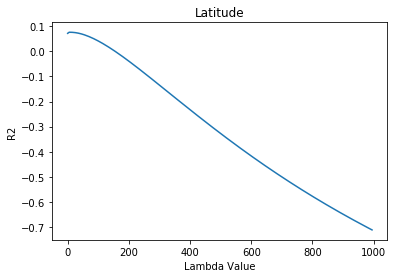

In [32]:
plot_by_lambda_Ridge(X_train,X_val, longitude_train,longitude_val,latitude_train,latitude_val)

Implemented R2 score:  0.07590162382468513
ScikitLearn R2 score:  0.07590162382468513


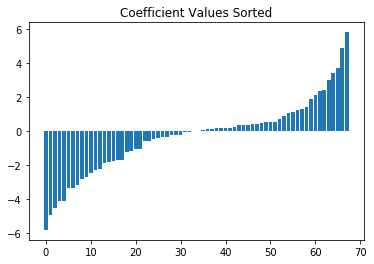

In [33]:
Ridge = RidgeLinearRegression(regularizer_coef=5)
Ridge.fit(X_train,latitude_train)
Ridge.predict(X_val,latitude_val)
Ridge.coef_values()

Implemented R2 score:  0.2295861064039053
ScikitLearn R2 score:  0.2295861064039053


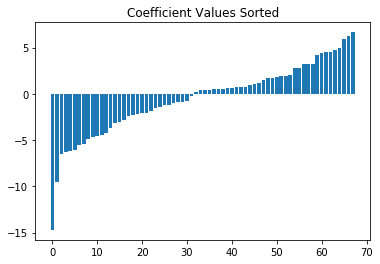

In [34]:
Ridge = RidgeLinearRegression(regularizer_coef=75)
Ridge.fit(X_train,longitude_train)
Ridge.predict(X_val,longitude_val)
Ridge.coef_values()

### 2-C. 
* A regression regularized by L1 (equivalently, a lasso regression). You should estimate the
regularization coefficient that produces the minimum error. How many variables are used by this
regression? Is the regularized regression better than the unregularized regression?

* **ANS)** 

* For Lasso regression, the regularization seems better than vanilla regression. 

* The coefficient that produces the minimum error is 465 and 75.

* For Longitude, 25 variables were not used. For Latitude, 22 variables were not used

In [ ]:
def plot_by_lambda_Lasso(X_train,X_val, longitude_train,longitude_val,latitude_train,latitude_val,lambda_max=200):
    lambda_lists =[5*i for i in range(lambda_max)]
    r2_vals_longitude ={}
    r2_vals_latitude ={}
    for lambda_val in lambda_lists:
        Lasso = LassoLinearRegression(regularizer_coef=lambda_val)
        Lasso.fit(X_train,longitude_train)
        r2_vals_longitude[lambda_val]=Lasso.predict(X_val,longitude_val,False)


        Lasso = LassoLinearRegression(regularizer_coef=lambda_val)
        Lasso.fit(X_train,latitude_train)
        r2_vals_latitude[lambda_val]=Lasso.predict(X_val,latitude_val,False)
        
    max_value_longitude = max(r2_vals_longitude.values())  # maximum value
    max_keys_longitude = [k for k, v in r2_vals_longitude.items() if v == max_value_longitude]

    max_value_latitude = max(r2_vals_latitude.values())  # maximum value
    max_keys_latitude = [k for k, v in r2_vals_latitude.items() if v == max_value_latitude]
    
    print('Longitude')
    print(f'R2 Value:{max_value_longitude}, Lambda: {max_keys_longitude[0]}')
    print('Latitude')
    print(f'R2 Value:{max_value_latitude}, Lambda: {max_keys_latitude[0]}')
    
    lists_longitude = sorted(r2_vals_longitude.items())
    lists_latitude = sorted(r2_vals_latitude.items())
    x_long, y_long = zip(*lists_longitude)
    plt.title('Longitude')
    plt.xlabel('Lambda Value')
    plt.ylabel('R2')
    plt.plot(x_long, y_long)
    plt.savefig('fig/lambda_longitude_lasso.png',dpi=300)
    plt.show()
    plt.title('Latitude')
    plt.xlabel('Lambda Value')
    plt.ylabel('R2')
    x_lat, y_lat = zip(*lists_latitude)
    plt.plot(x_lat, y_lat)
    plt.savefig('fig/lambda_latitude_lasso.png',dpi=300)
    plt.show()

Longitude
R2 Value:0.25857180280227876, Lambda: 465
Latitude
R2 Value:0.07674964131631956, Lambda: 75


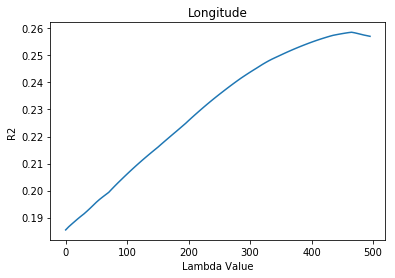

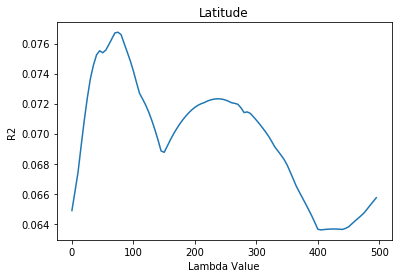

In [37]:
plot_by_lambda_Lasso(X_train,X_val, longitude_train,longitude_val,latitude_train,latitude_val,lambda_max=100)

Implemented R2 score:  0.2953400261165342
ScikitLearn R2 score:  0.2953400261165342


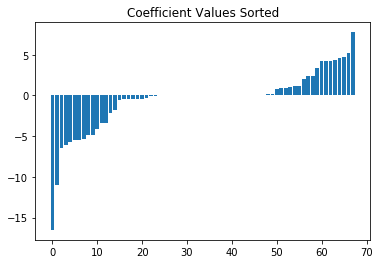

In [114]:
Lasso = LassoLinearRegression(regularizer_coef=465)
Lasso.fit(X_train,longitude_train)
Lasso.predict(X_test,longitude_test)
Lasso.coef_values()

In [108]:
Lasso.count_zero_coefs()

There are total of 25 zeros in coefficients out of 68


Implemented R2 score:  0.25690440028826733
ScikitLearn R2 score:  0.25690440028826733


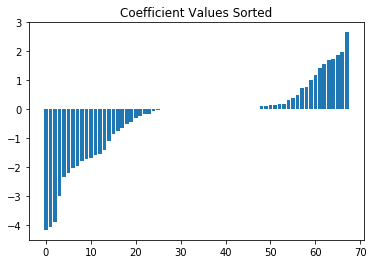

In [112]:
Lasso = LassoLinearRegression(regularizer_coef=75)
Lasso.fit(X_train,latitude_train)
Lasso.predict(X_test,latitude_test)
Lasso.coef_values()

In [113]:
Lasso.count_zero_coefs()

There are total of 22 zeros in coefficients out of 68


### 3. 
* Summarize what you found by comparing all three methods. 

* **ANS)**

* It was interesting to find out that Regularization **doesn't necessary mean better performance**. There are several cases where the vanilla model outperforms the regularized one. However, regularized method did indeed show **stable performance** compared to vanilla models. They had in general smaller box plots compared to vanilla. Regularized method(Lasso) also **shows more interpretability** in that less important variables are totally ignored. 

* The performance varied greatly depending on how we split the dataset. Especially for latitude testing, the quantiles of vanilla model was noticeably larger than that of others